<span style="font-family: Arial; font-size: 18pt; display: block;text-align: center;">**Predictive Modeling of Medical Costs for Hospital Resource Allocation**</span>
<span style="font-family: Arial; font-size: 12pt; display: block;text-align: center;">**Murshida Meethale Purayil , Entri Elevate, 12-May-2024**</span>

<span style="font-family: Arial; font-size: 14pt;">**Introduction:** </span>

<span style="font-family: Arial; font-size: 10pt;">In the modern healthcare landscape, optimizing resource allocation while ensuring quality patient care is crucial for healthcare providers. Hospital ABC aims to enhance its resource allocation and patient support services by understanding the factors influencing medical costs. This project utilizes a comprehensive dataset containing demographic, lifestyle, health status, and other relevant information to predict medical costs for individual patients. By accurately estimating medical expenses, Hospital ABC can allocate resources effectively and improve healthcare planning, ultimately enhancing patient outcomes.</span>

<span style="font-family: Arial; font-size: 14pt;">**Problem Statement:** </span>

<span style="font-family: Arial; font-size: 10pt;">Hospital ABC faces the challenge of understanding the complex interplay of demographic factors, lifestyle choices, health status, insurance plan types, and other variables that influence medical costs. Developing a predictive model to estimate these costs based on patient characteristics will enable Hospital ABC to optimize resource allocation and enhance patient support services. </span>

<span style="font-family: Arial; font-size: 14pt;">**Objectives:** </span>

<span style="font-family: Arial; font-size: 10pt;">-Explore the relationship between demographic factors, lifestyle-related information, health status, insurance plan type, and medical costs.

-Develop a predictive model to estimate medical costs for individual patients.

-Evaluate the performance of the predictive model using appropriate metrics.

-Provide actionable insights for Hospital ABC to optimize resource allocation and enhance healthcare planning.
 </span>

<span style="font-family: Arial; font-size: 14pt;">**Data Collection:** </span>

In [876]:
pip install openpyxl numpy pandas matplotlib seaborn scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [878]:
#Importing necessary libraries

In [880]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer



In [881]:
MedicalData = pd.read_excel("medical data.xlsx")
MedicalData.head(10)

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,62,M,23.39610,4,Yes,East,White Collar,Rarely,Heart Disease,HMO,...,Easy,High,NaN,NaN,NaN,Other,NaN,1.0,18.0,7604.947
1,65,M,22.03668,4,Yes,North,Retired,2 times/week,Heart Disease,HDHP,...,Easy,Low,Moderate,Yes,Moderate,Asthma,NaN,0.0,1.0,7067.338
2,71,M,23.03985,1,No,North,Retired,Rarely,NaN,HMO,...,Moderate,High,NaN,NaN,Moderate,Obesity,Yes,2.0,15.0,4478.128
3,18,F,24.82284,0,Yes,North,Self Employed,Daily,Arthritis,PPO,...,NaN,NaN,NaN,NaN,High,Cancer,No,3.0,9.0,12944.880
4,21,M,23.44420,1,No,North,Professional,Daily,Arthritis,HDHP,...,Easy,Low,NaN,Yes,Moderate,Other,NaN,0.0,17.0,8275.411
5,77,M,11.95529,3,Yes,East,Self Employed,2 times/week,NaN,PPO,...,Moderate,Low,Moderate,Yes,High,Other,Yes,1.0,13.0,4008.173
6,21,M,27.55610,4,Yes,NaN,Blue Collar,2 times/week,High Blood Pressure,HMO,...,Easy,Moderate,Low,No,NaN,NaN,NaN,4.0,15.0,6105.568
7,57,F,17.60840,2,No,South,Blue Collar,2 times/week,Arthritis,HDHP,...,Difficult,High,High,Yes,NaN,Other,Yes,3.0,4.0,9744.409
8,27,F,20.96697,0,Yes,South,White Collar,Rarely,Diabetes,HDHP,...,NaN,NaN,Low,NaN,High,Asthma,Yes,3.0,12.0,11119.010
9,37,M,NaN,2,No,West,Blue Collar,3 times/week,Diabetes,HMO,...,Difficult,High,NaN,NaN,Moderate,Other,No,2.0,8.0,8988.610


In [882]:
print (MedicalData.shape)

(1000, 35)


In [883]:
print (MedicalData.columns)

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Occupation',
       'Exercise_Frequency', 'Chronic_Conditions', 'Insurance_Plan_Type',
       'Marital_Status', 'Distance_to_Nearest_Hospital', 'Income_Level',
       'Family_Medical_History', 'Primary_Care_Physician_Visits',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine',
       'Emergency_Room_Visits', 'Healthcare_Utilization', 'Charges'],
      dtype='object')


In [884]:
print (MedicalData.info)

<bound method DataFrame.info of      Age Sex       BMI  Children Smoker Region     Occupation  \
0     62   M  23.39610         4    Yes   East   White Collar   
1     65   M  22.03668         4    Yes  North        Retired   
2     71   M  23.03985         1     No  North        Retired   
3     18   F  24.82284         0    Yes  North  Self Employed   
4     21   M  23.44420         1     No  North   Professional   
..   ...  ..       ...       ...    ...    ...            ...   
995   75   M  24.18366         3     No   West    Blue Collar   
996   24   F  36.91005         0     No   East        Student   
997   37   M  25.34770         4    Yes  North    Blue Collar   
998   52   F  26.18630         1     No   West        Retired   
999   68   M  31.11520         1    Yes   West    Blue Collar   

    Exercise_Frequency   Chronic_Conditions Insurance_Plan_Type  ...  \
0               Rarely        Heart Disease                 HMO  ...   
1         2 times/week        Heart Disease

In [885]:
MedicalData["Charges"] = MedicalData["Charges"].astype("int64")

In [886]:
MedicalData.describe()

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges
count,1000.000000,984.000000,1000.000000,994.000000,1000.000000,993.000000,994.000000,1000.000000
mean,48.167000,25.096119,1.918000,10.623046,4.964000,2.028197,10.151911,10148.740000
std,18.009427,4.929889,1.428747,5.449890,2.599897,1.414645,5.449028,3006.202692
min,18.000000,8.889366,0.000000,1.000381,1.000000,0.000000,1.000000,1910.000000
25%,33.000000,21.891128,1.000000,5.893609,3.000000,1.000000,6.000000,8192.750000
50%,48.000000,25.270985,2.000000,10.953870,5.000000,2.000000,10.000000,10228.500000
75%,64.000000,28.176527,3.000000,15.288303,7.000000,3.000000,15.000000,12156.750000
max,79.000000,39.558080,4.000000,19.996930,9.000000,4.000000,19.000000,19139.000000


In [887]:
MedicalData.describe(include=["object", "bool"])

,Sex,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,Marital_Status,Income_Level,Family_Medical_History,...,Stress_Level,Medication_Adherence,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine
count,1000,999,999,1000,1000,796,1000,1000,1000,1000,...,755,689,746,736,770,736,685,764,844,676
unique,2,2,4,6,5,4,3,2,3,2,...,3,2,3,3,3,3,2,3,6,2
top,F,Yes,South,Blue Collar,2 times/week,Heart Disease,PPO,Single,Low,Yes,...,Low,No,Moderate,Moderate,High,High,No,Moderate,Asthma,No
freq,514,510,274,190,227,207,340,520,341,506,...,263,355,258,259,263,259,347,260,153,363


In [888]:
print("\nData types of each variable:")
print(MedicalData.dtypes)
print("\nMissing values:")
print(MedicalData.isnull().sum())  # Check for missing values


Data types of each variable:
Age                                int64
Sex                               object
BMI                              float64
Children                           int64
Smoker                            object
Region                            object
Occupation                        object
Exercise_Frequency                object
Chronic_Conditions                object
Insurance_Plan_Type               object
Marital_Status                    object
Distance_to_Nearest_Hospital     float64
Income_Level                      object
Family_Medical_History            object
Primary_Care_Physician_Visits      int64
Mental_Health_Status              object
Prescription_Medication_Usage     object
Employment_Status                 object
Education_Level                   object
Dietary_Habits                    object
Alcohol_Consumption               object
Sleep_Quality                     object
Stress_Level                      object
Medication_Adherence       

In [889]:
obj = (MedicalData.dtypes=='object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (MedicalData.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (MedicalData.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 27
Integer variables: 4
Float variables: 4


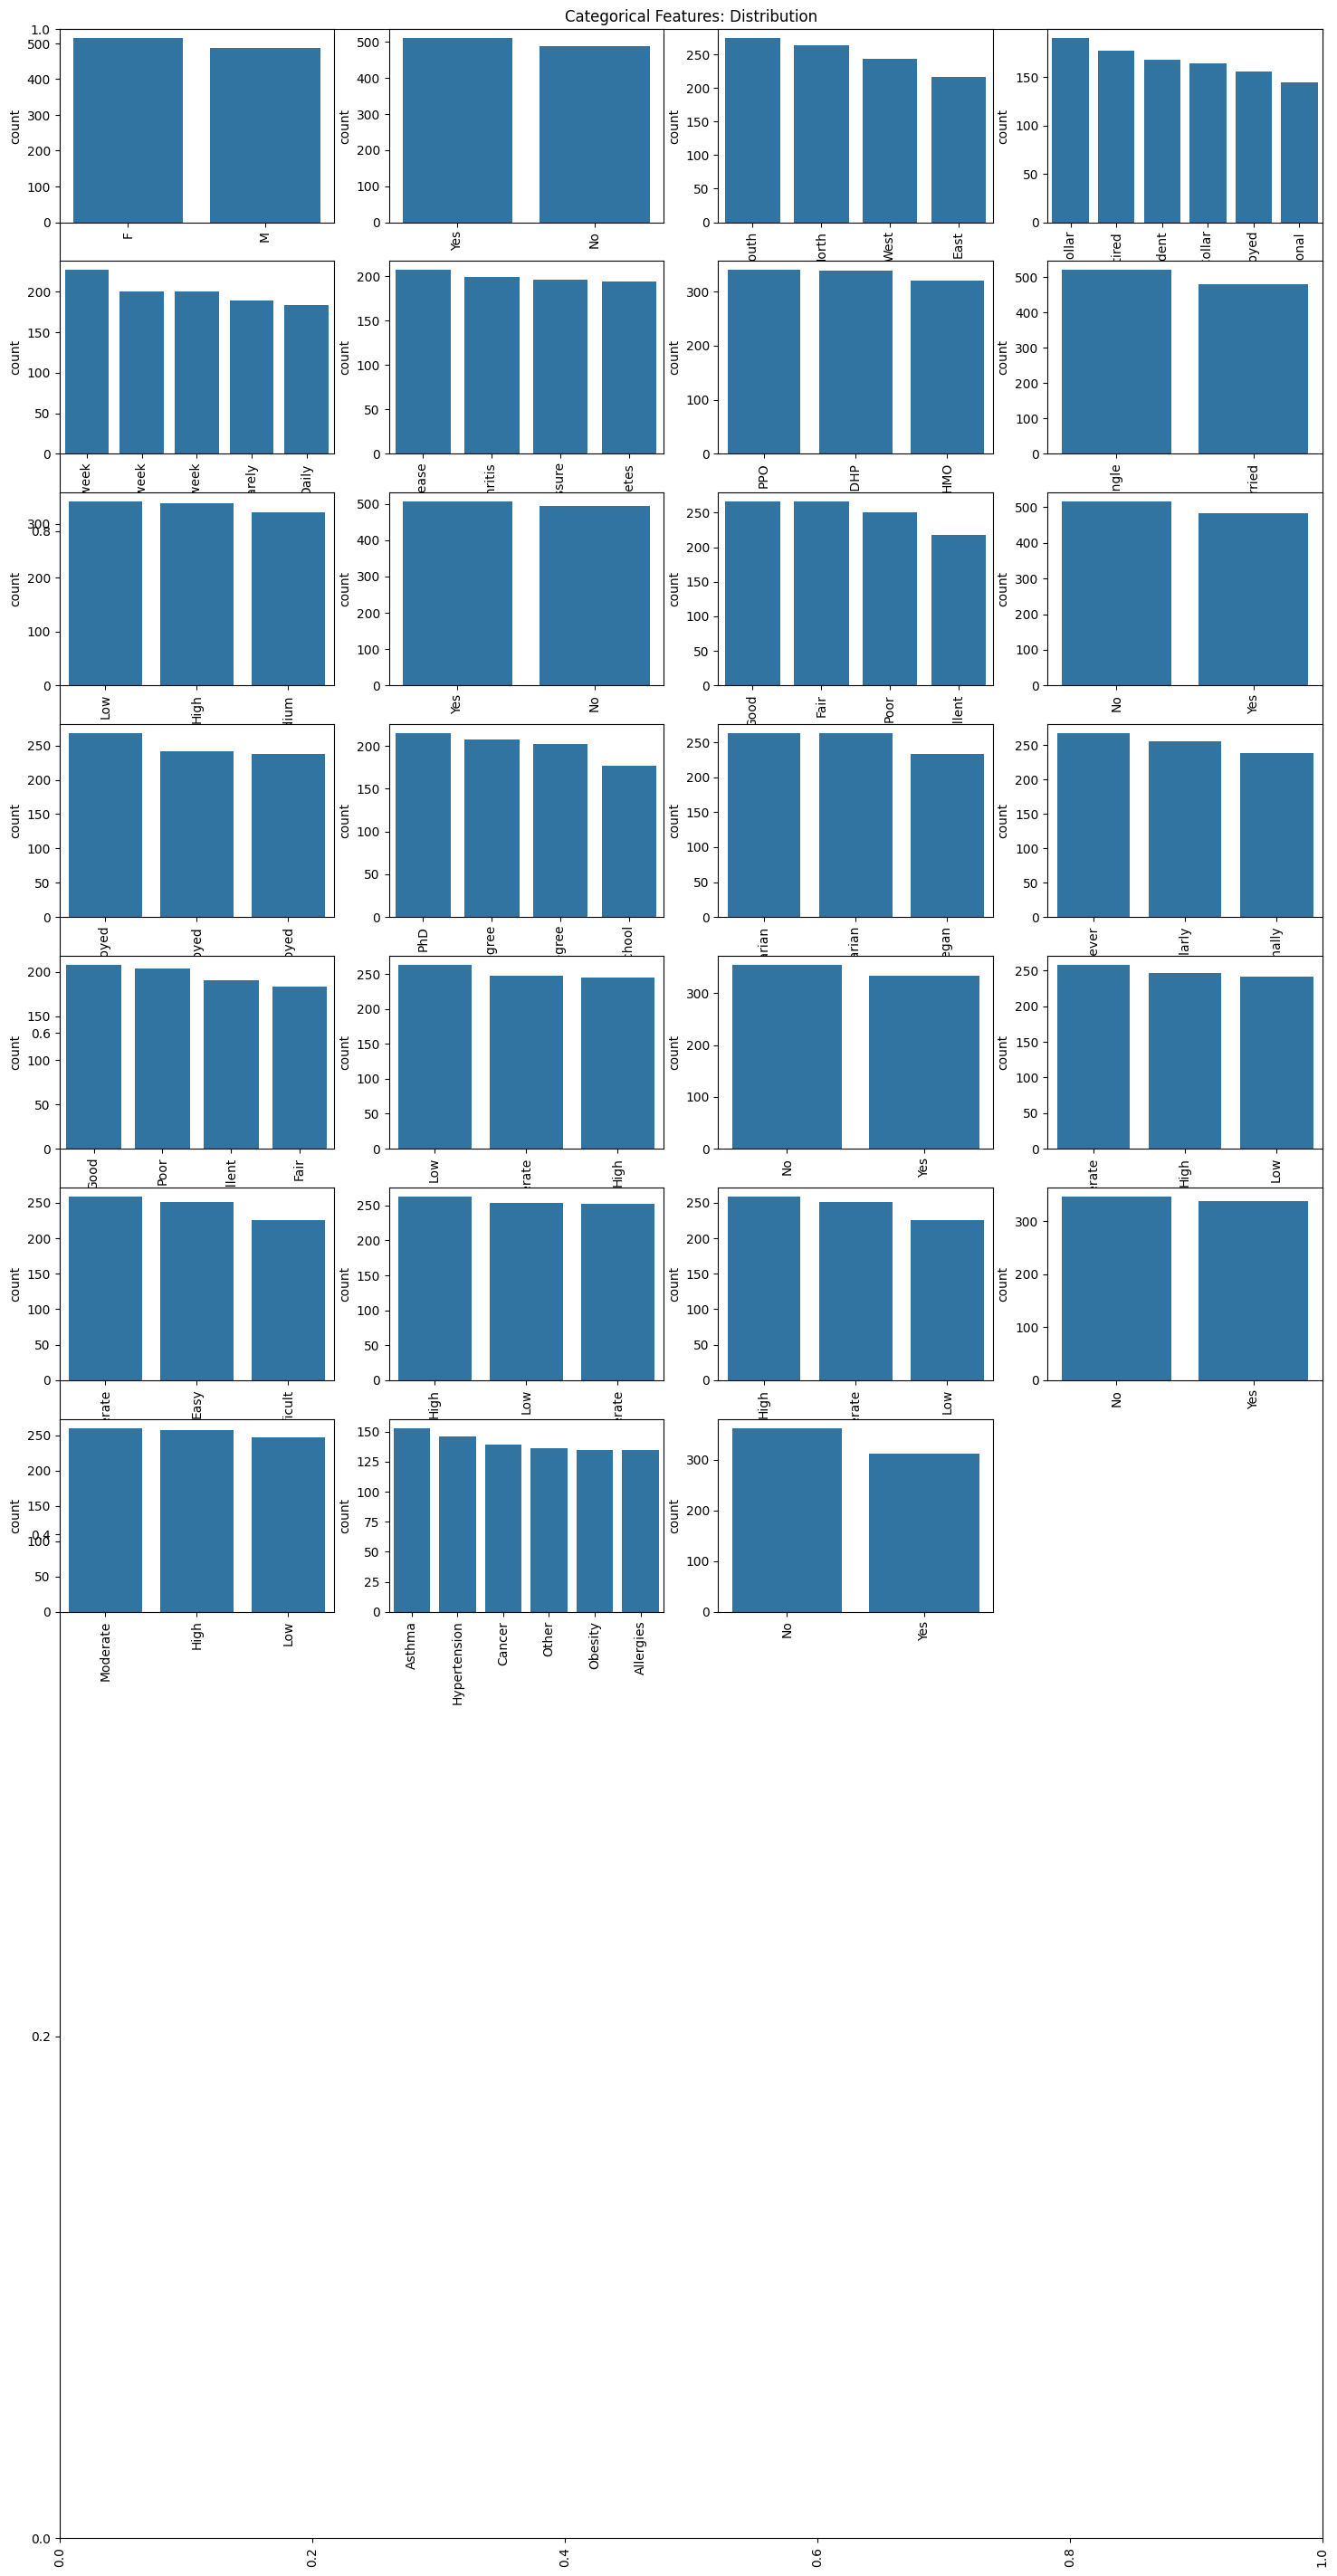

In [890]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = MedicalData[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1

<span style="font-family: Arial; font-size: 14pt;">**Data Visualization:** </span>

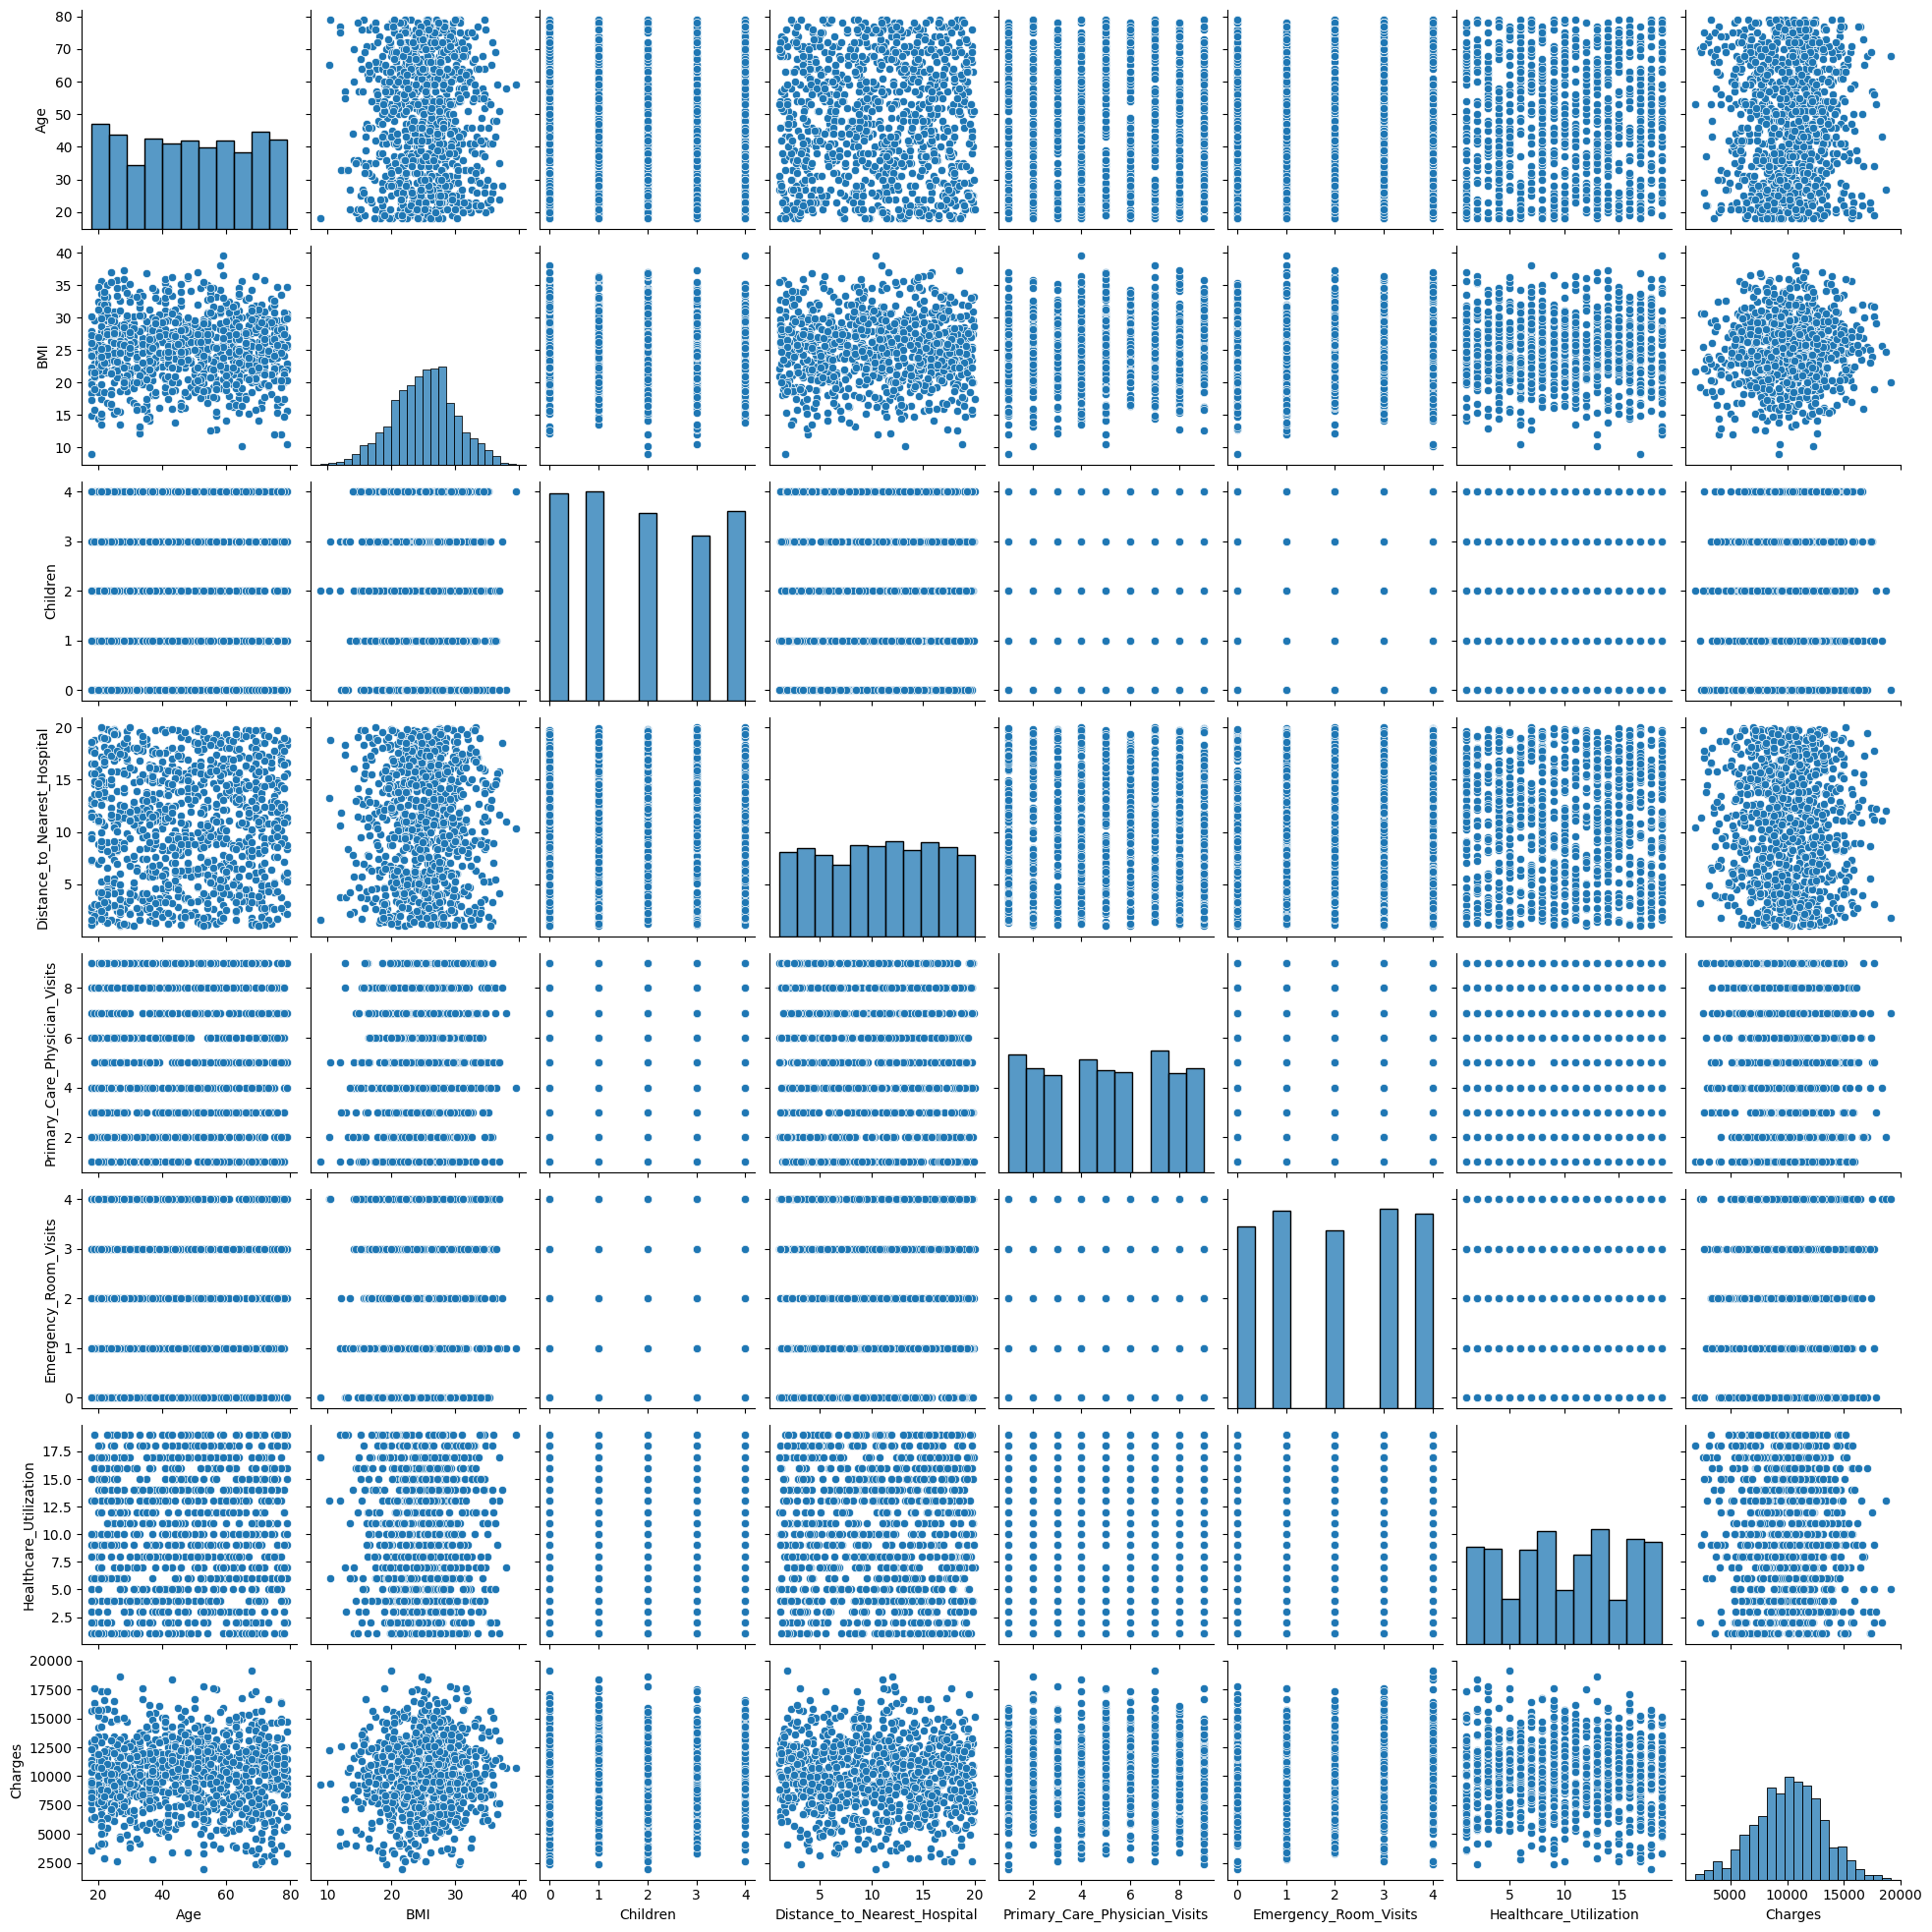

In [891]:
sns.pairplot(MedicalData)
plt.show()

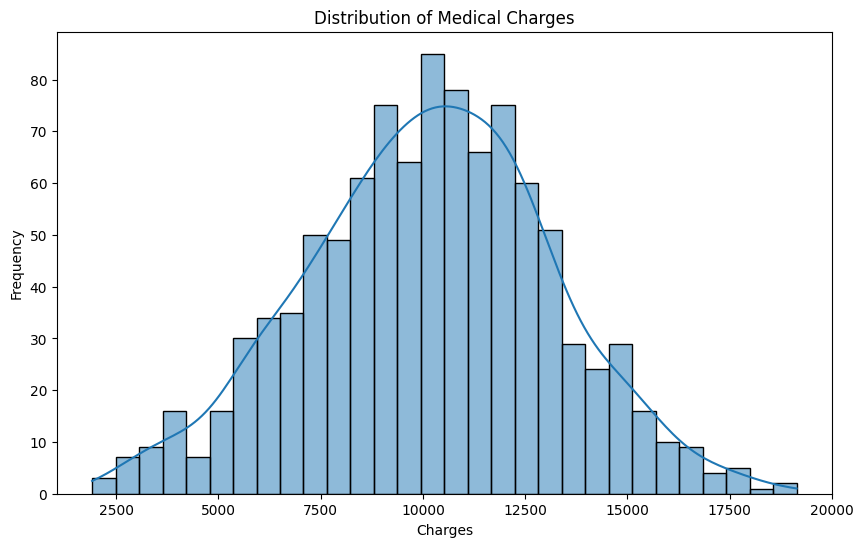

In [892]:

# Explore distribution of medical charges
plt.figure(figsize=(10, 6))
sns.histplot(MedicalData['Charges'], bins=30, kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()



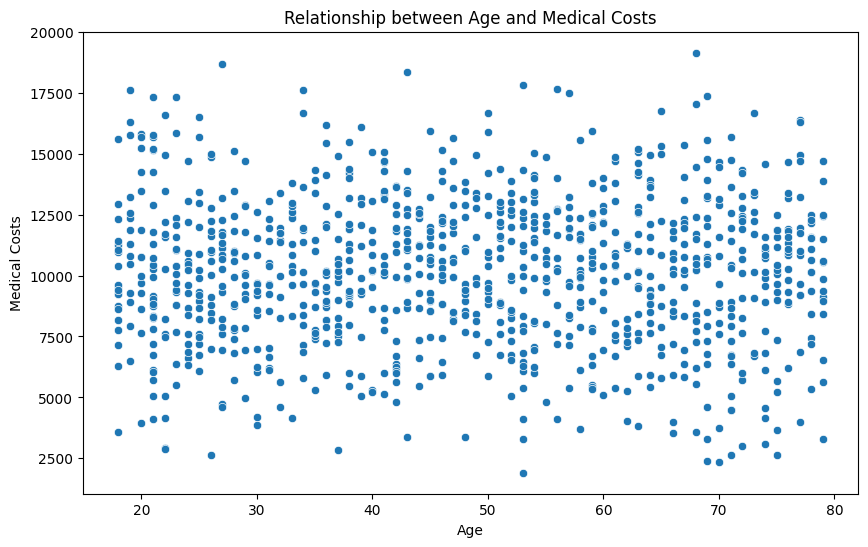

In [893]:
#Relationship between Age and Medical Costs:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Charges', data=MedicalData)
plt.title('Relationship between Age and Medical Costs')
plt.xlabel('Age')
plt.ylabel('Medical Costs')
plt.show()

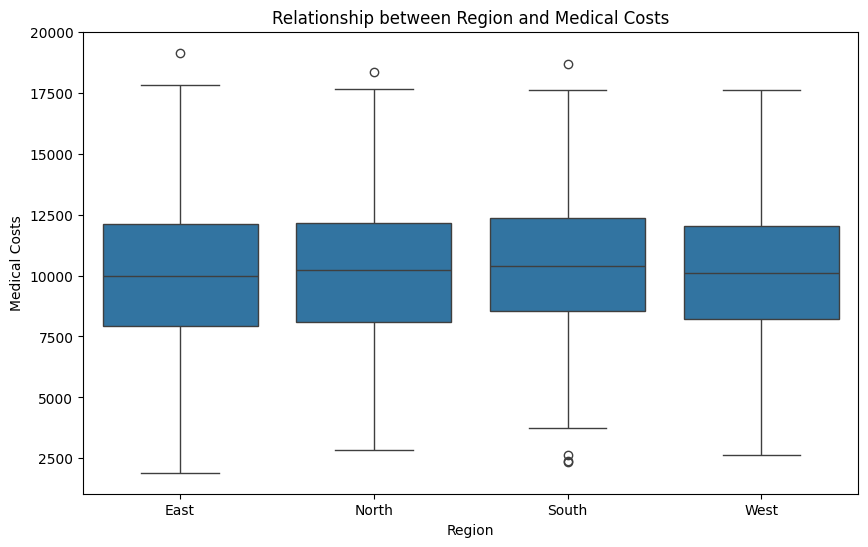

In [894]:
#Relationship between Region and Medical Costs:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Charges', data=MedicalData)
plt.title('Relationship between Region and Medical Costs')
plt.xlabel('Region')
plt.ylabel('Medical Costs')
plt.show()

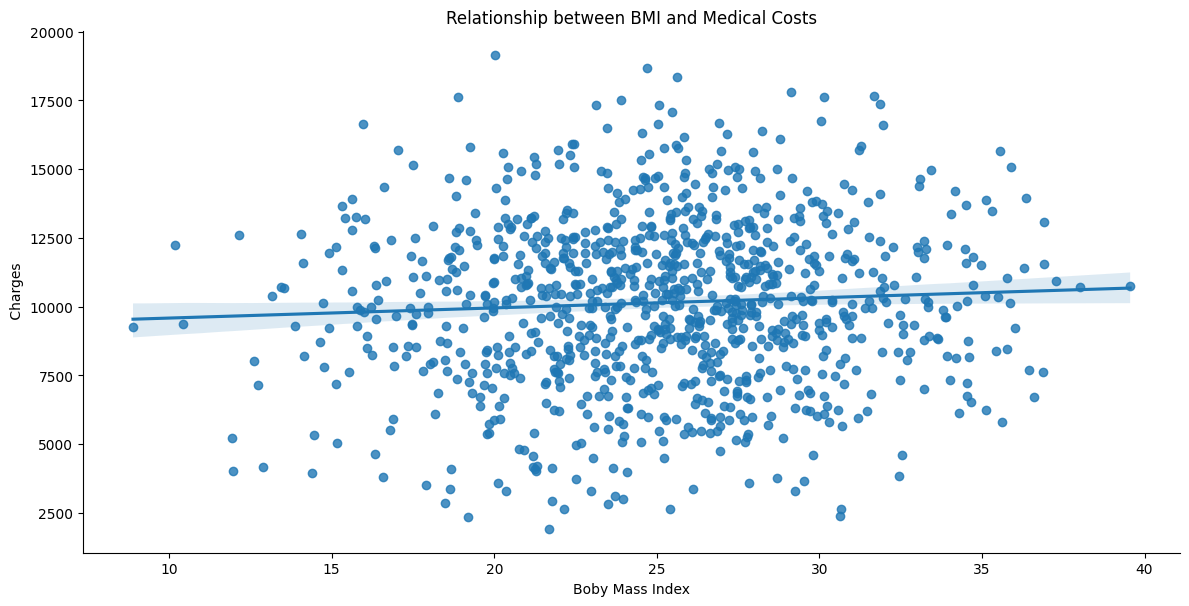

In [895]:
#Relationship between BMI and Medical Costs:

sns.lmplot(x='BMI',y='Charges',data=MedicalData,aspect=2,height=6)
plt.xlabel('Boby Mass Index')
plt.ylabel(' Charges')
plt.title('Relationship between BMI and Medical Costs');

C:\Users\mursh\AppData\Local\Temp\ipykernel_8216\1139183943.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='Charges',data=MedicalData,palette='Wistia',ax=ax)
C:\Users\mursh\AppData\Local\Temp\ipykernel_8216\1139183943.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Smoker', y='Charges',data=MedicalData,palette='magma',ax=ax)


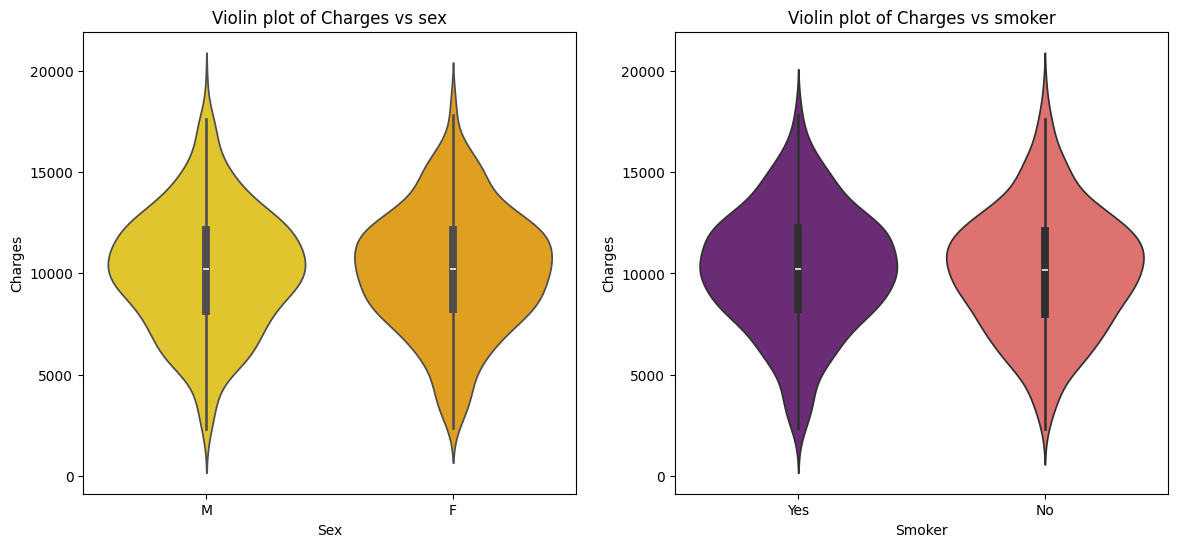

In [896]:
#Relationship between Sex and Smoking Status with Medical Costs:

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='Sex', y='Charges',data=MedicalData,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='Smoker', y='Charges',data=MedicalData,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

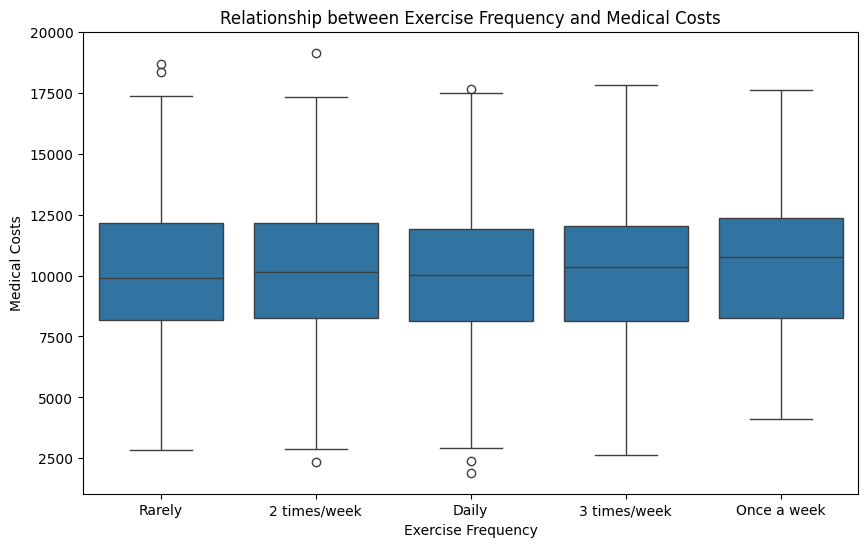

In [897]:
#Relationship between Exercise Frequency and Medical Costs:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exercise_Frequency', y='Charges', data=MedicalData)
plt.title('Relationship between Exercise Frequency and Medical Costs')
plt.xlabel('Exercise Frequency')
plt.ylabel('Medical Costs')
plt.show()

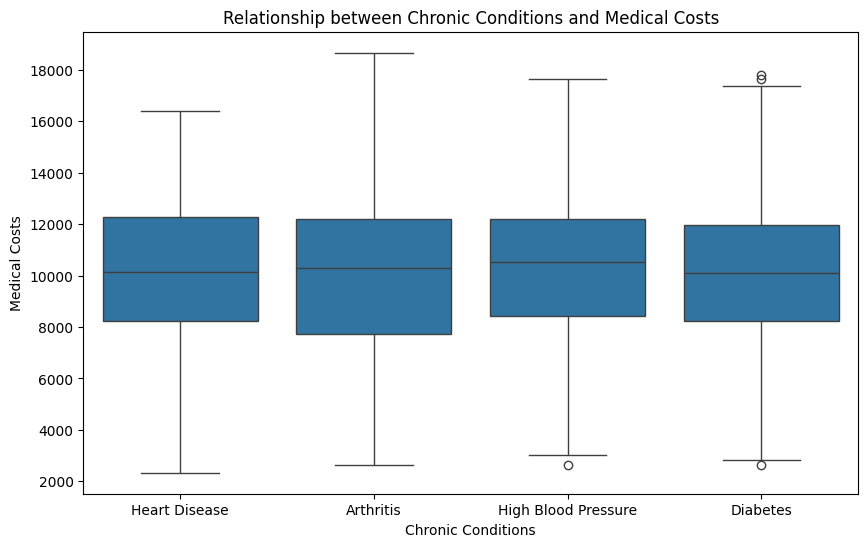

In [898]:
#Relationship between Chronic Conditions and Medical Costs:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Chronic_Conditions', y='Charges', data=MedicalData)
plt.title('Relationship between Chronic Conditions and Medical Costs')
plt.xlabel('Chronic Conditions')
plt.ylabel('Medical Costs')
plt.show()

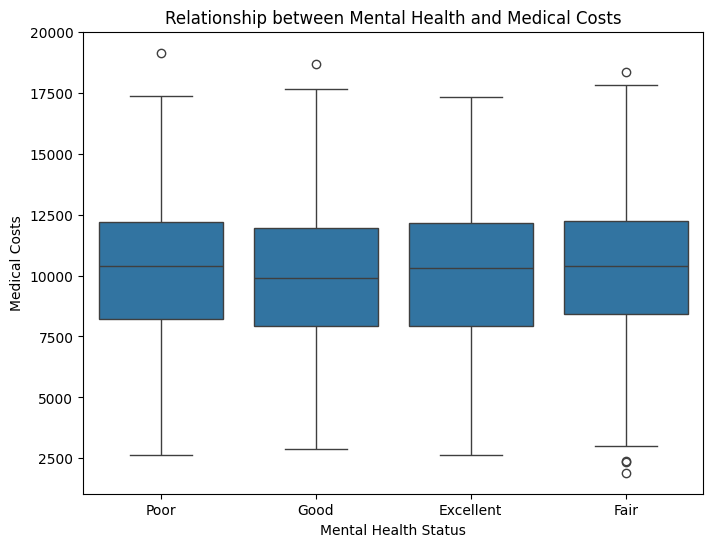

In [899]:
#Relationship between Mental Health and Medical Costs:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Mental_Health_Status', y='Charges', data=MedicalData)
plt.title('Relationship between Mental Health and Medical Costs')
plt.xlabel('Mental Health Status')
plt.ylabel('Medical Costs')
plt.show()

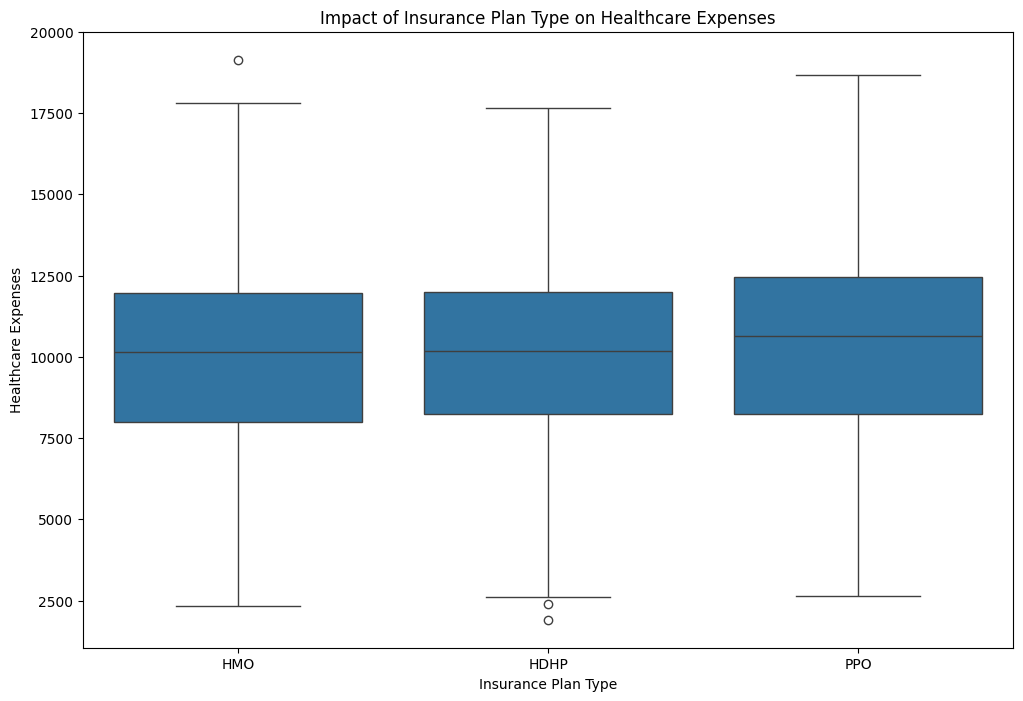

In [900]:
medical_data = MedicalData[['Insurance_Plan_Type', 'Income_Level', 'Family_Medical_History', 'Charges']]

# Data Exploration
# Visualize the relationships between features and healthcare expenses
plt.figure(figsize=(12, 8))
sns.boxplot(x='Insurance_Plan_Type', y='Charges', data=medical_data)
plt.title('Impact of Insurance Plan Type on Healthcare Expenses')
plt.xlabel('Insurance Plan Type')
plt.ylabel('Healthcare Expenses')
plt.show()


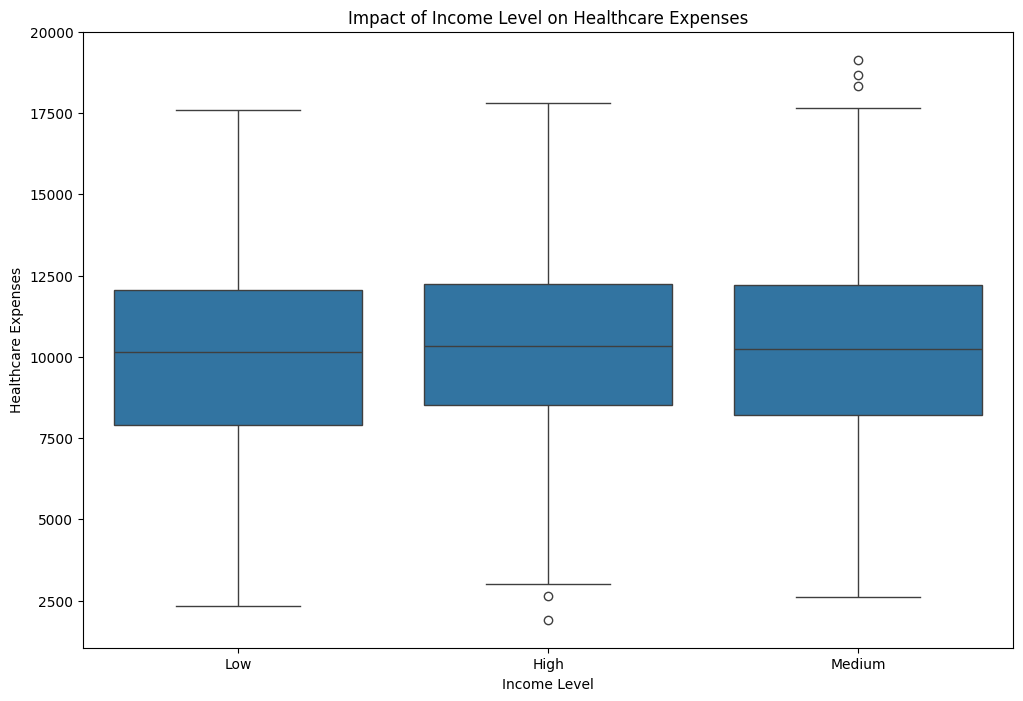

In [901]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income_Level', y='Charges', data=medical_data)
plt.title('Impact of Income Level on Healthcare Expenses')
plt.xlabel('Income Level')
plt.ylabel('Healthcare Expenses')
plt.show()

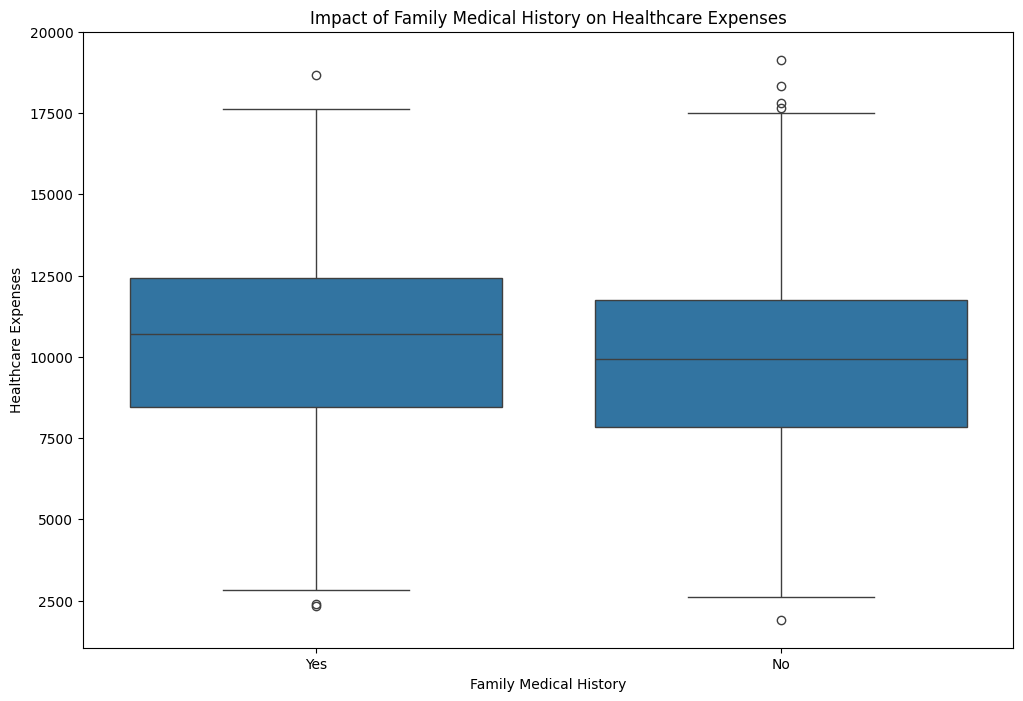

In [902]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Family_Medical_History', y='Charges', data=medical_data)
plt.title('Impact of Family Medical History on Healthcare Expenses')
plt.xlabel('Family Medical History')
plt.ylabel('Healthcare Expenses')
plt.show()


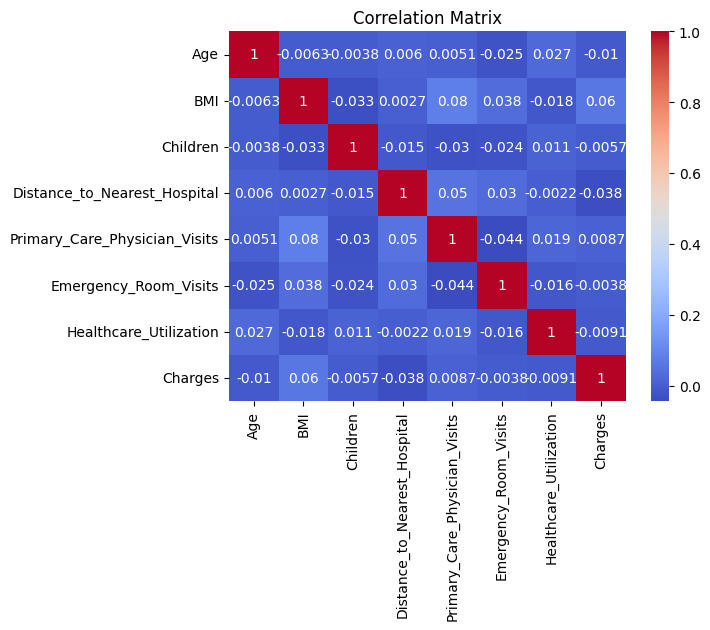

In [903]:
numerical_columns = MedicalData.select_dtypes(include=[ 'float64','int64']).columns
corr = MedicalData[numerical_columns].corr()  


sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title("Correlation Matrix")
plt.show()

C:\Users\mursh\AppData\Local\Temp\ipykernel_8216\2238084331.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MedicalData['Charges'],bins=50,color='r',ax=ax)


Text(0.5, 1.0, 'Distribution of insurance charges')

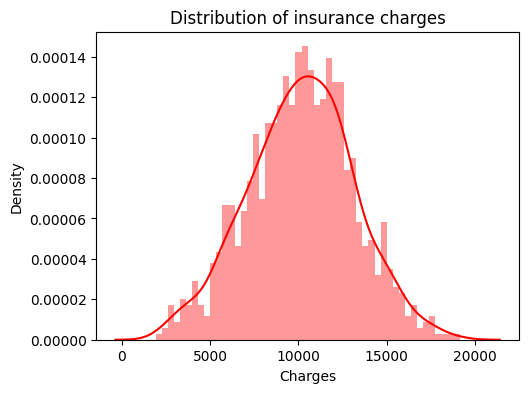

In [904]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(MedicalData['Charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')


In [905]:
categorical_columns = MedicalData.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
       'Chronic_Conditions', 'Insurance_Plan_Type', 'Marital_Status',
       'Income_Level', 'Family_Medical_History', 'Mental_Health_Status',
       'Prescription_Medication_Usage', 'Employment_Status', 'Education_Level',
       'Dietary_Habits', 'Alcohol_Consumption', 'Sleep_Quality',
       'Stress_Level', 'Medication_Adherence', 'Physical_Activity',
       'Access_to_Healthcare', 'Social_Support', 'Environmental_Factors',
       'Genetic_Predisposition', 'Health_Literacy_Level', 'Comorbidities',
       'Access_to_Telemedicine'],
      dtype='object')


In [906]:
percentage_df = pd.DataFrame(index=['Percentage of Unique Values'])

# Loop through each categorical column
for col in categorical_columns:
    # Calculate the percentage of unique values
    percentage = (MedicalData[col].value_counts() / len(MedicalData)) * 100
    # Add percentages to the DataFrame
    percentage_df[col] = percentage
    print (col,percentage)



Sex Sex
F    51.4
M    48.6
Name: count, dtype: float64
Smoker Smoker
Yes    51.0
No     48.9
Name: count, dtype: float64
Region Region
South    27.4
North    26.4
West     24.4
East     21.7
Name: count, dtype: float64
Occupation Occupation
Blue Collar      19.0
Retired          17.7
Student          16.8
White Collar     16.4
Self Employed    15.6
Professional     14.5
Name: count, dtype: float64
Exercise_Frequency Exercise_Frequency
2 times/week    22.7
3 times/week    20.0
Once a week     20.0
Rarely          18.9
Daily           18.4
Name: count, dtype: float64
Chronic_Conditions Chronic_Conditions
Heart Disease          20.7
Arthritis              19.9
High Blood Pressure    19.6
Diabetes               19.4
Name: count, dtype: float64
Insurance_Plan_Type Insurance_Plan_Type
PPO     34.0
HDHP    33.9
HMO     32.1
Name: count, dtype: float64
Marital_Status Marital_Status
Single     52.0
Married    48.0
Name: count, dtype: float64
Income_Level Income_Level
Low       34.1
High      3

<span style="font-family: Arial; font-size: 14pt;">**Data Preprocessing:** </span>

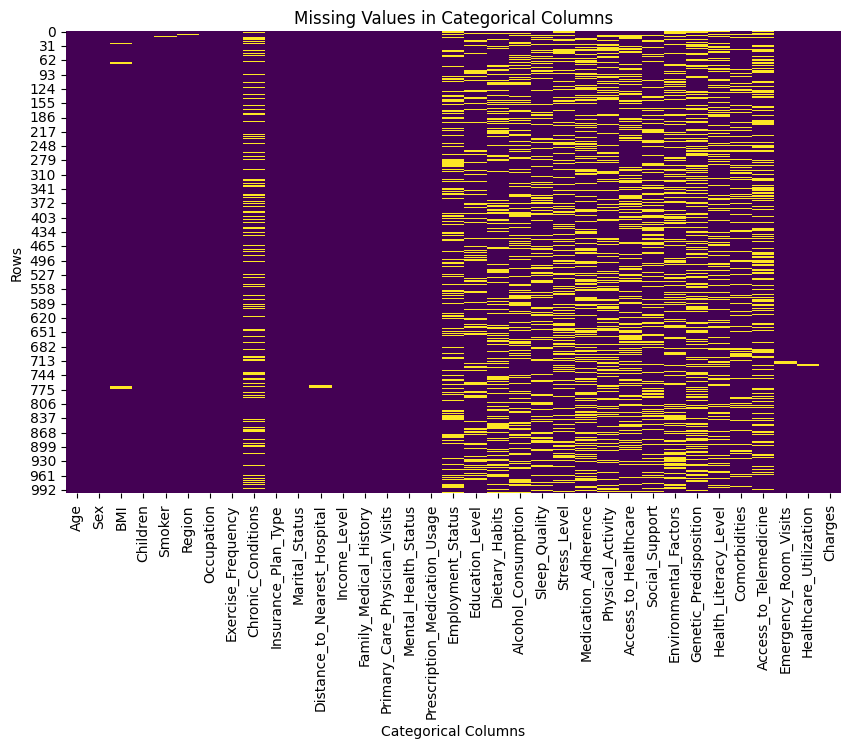

In [907]:
missing_values_indicator = MedicalData.isnull().astype(int)

# Plot the missingness heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_indicator, cmap='viridis', cbar=False)
plt.title('Missing Values in Categorical Columns')
plt.xlabel('Categorical Columns')
plt.ylabel('Rows')
plt.show()

<span style="font-family: Arial; font-size: 14pt;">**Handling Missing Values:** </span>

In [908]:
from sklearn.impute import SimpleImputer
import pandas as pd
mean_cols = ['BMI', 'Emergency_Room_Visits', 'Healthcare_Utilization','Distance_to_Nearest_Hospital']
mode_cols = ['Smoker', 'Region']
mean_imputer = SimpleImputer(strategy='mean')
MedicalData[mean_cols] = mean_imputer.fit_transform(MedicalData[mean_cols])
mode_imputer = SimpleImputer(strategy='most_frequent')
MedicalData[mode_cols] = mode_imputer.fit_transform(MedicalData[mode_cols])
print(MedicalData.isnull().sum()) 




Age                                0
Sex                                0
BMI                                0
Children                           0
Smoker                             0
Region                             0
Occupation                         0
Exercise_Frequency                 0
Chronic_Conditions               204
Insurance_Plan_Type                0
Marital_Status                     0
Distance_to_Nearest_Hospital       0
Income_Level                       0
Family_Medical_History             0
Primary_Care_Physician_Visits      0
Mental_Health_Status               0
Prescription_Medication_Usage      0
Employment_Status                252
Education_Level                  198
Dietary_Habits                   241
Alcohol_Consumption              240
Sleep_Quality                    214
Stress_Level                     245
Medication_Adherence             311
Physical_Activity                254
Access_to_Healthcare             264
Social_Support                   230
E

In [909]:
#selecting categorical columns that have null values 
Categorical_Columns = MedicalData.select_dtypes(include=['object']).columns
print (categorical_columns)
categorical_columns_withNull = MedicalData[categorical_columns].columns[MedicalData[categorical_columns].isnull().any()]
print (categorical_columns_withNull)


Index(['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
       'Chronic_Conditions', 'Insurance_Plan_Type', 'Marital_Status',
       'Income_Level', 'Family_Medical_History', 'Mental_Health_Status',
       'Prescription_Medication_Usage', 'Employment_Status', 'Education_Level',
       'Dietary_Habits', 'Alcohol_Consumption', 'Sleep_Quality',
       'Stress_Level', 'Medication_Adherence', 'Physical_Activity',
       'Access_to_Healthcare', 'Social_Support', 'Environmental_Factors',
       'Genetic_Predisposition', 'Health_Literacy_Level', 'Comorbidities',
       'Access_to_Telemedicine'],
      dtype='object')
Index(['Chronic_Conditions', 'Employment_Status', 'Education_Level',
       'Dietary_Habits', 'Alcohol_Consumption', 'Sleep_Quality',
       'Stress_Level', 'Medication_Adherence', 'Physical_Activity',
       'Access_to_Healthcare', 'Social_Support', 'Environmental_Factors',
       'Genetic_Predisposition', 'Health_Literacy_Level', 'Comorbidities',
       'Access_to_

In [910]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Assuming 'MedicalData' is your DataFrame containing the medical data
# Identify columns with missing values
columns_with_missing = MedicalData.columns[MedicalData.isnull().any()]

# Create a copy of the DataFrame to avoid modifying the original data
MedicalData_imputed = MedicalData.copy()

# Encode categorical variables to numerical format
encoder = OrdinalEncoder()
MedicalData_imputed[columns_with_missing] = encoder.fit_transform(MedicalData[columns_with_missing])

# Impute missing values with KNN
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
MedicalData_imputed[columns_with_missing] = imputer.fit_transform(MedicalData_imputed[columns_with_missing])

# Convert encoded values back to original categorical values
MedicalData_imputed[columns_with_missing] = encoder.inverse_transform(MedicalData_imputed[columns_with_missing])

# Check for any remaining missing values
missing_values = MedicalData_imputed.isnull().sum().sum()
print("Number of missing values after imputation:", missing_values)


Number of missing values after imputation: 0


In [911]:
MedicalData = MedicalData_imputed.copy()

In [912]:
print(MedicalData.isnull().sum()) 

Age                              0
Sex                              0
BMI                              0
Children                         0
Smoker                           0
Region                           0
Occupation                       0
Exercise_Frequency               0
Chronic_Conditions               0
Insurance_Plan_Type              0
Marital_Status                   0
Distance_to_Nearest_Hospital     0
Income_Level                     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Mental_Health_Status             0
Prescription_Medication_Usage    0
Employment_Status                0
Education_Level                  0
Dietary_Habits                   0
Alcohol_Consumption              0
Sleep_Quality                    0
Stress_Level                     0
Medication_Adherence             0
Physical_Activity                0
Access_to_Healthcare             0
Social_Support                   0
Environmental_Factors            0
Genetic_Predispositi

<span style="font-family: Arial; font-size: 14pt;">**Data Cleaning:** </span>

In [913]:
# Select numerical columns excluding 'Charges'
numerical_columns = MedicalData.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_except_charges = numerical_columns.drop('Charges')

Q1 = MedicalData[numerical_columns_except_charges].quantile(0.25)
Q3 = MedicalData[numerical_columns_except_charges].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = (MedicalData[numerical_columns_except_charges] < lower_bound) | (MedicalData[numerical_columns_except_charges]> upper_bound)

# Count the number of outliers in each feature
num_outliers = outliers.sum()

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(num_outliers)

Number of outliers for each feature:
Age                              0
BMI                              9
Children                         0
Distance_to_Nearest_Hospital     0
Primary_Care_Physician_Visits    0
Emergency_Room_Visits            0
Healthcare_Utilization           0
dtype: int64


In [914]:

# Function remove outliers using IQR method
# Calculate the IQR for BMI
Q1_BMI = MedicalData['BMI'].quantile(0.25)
Q3_BMI = MedicalData['BMI'].quantile(0.75)
IQR_BMI = Q3_BMI - Q1_BMI

# Define the lower and upper bounds for outliers
lower_bound_BMI = Q1_BMI - 1.5 * IQR_BMI
upper_bound_BMI = Q3_BMI + 1.5 * IQR_BMI

# Replace outlier values with NaN
MedicalData.loc[(MedicalData['BMI'] < lower_bound_BMI) | (MedicalData['BMI'] > upper_bound_BMI), 'BMI'] = np.nan

# Now, you can handle the missing values (NaN) in the 'BMI' column as desired, such as removing them or imputing them
# For example, to remove rows with missing 'BMI' values:
MedicalData = MedicalData.dropna(subset=['BMI'])


# Print the cleaned DataFrame
print(MedicalData)

     Age Sex       BMI  Children Smoker Region     Occupation  \
0     62   M  23.39610         4    Yes   East   White Collar   
1     65   M  22.03668         4    Yes  North        Retired   
2     71   M  23.03985         1     No  North        Retired   
3     18   F  24.82284         0    Yes  North  Self Employed   
4     21   M  23.44420         1     No  North   Professional   
..   ...  ..       ...       ...    ...    ...            ...   
995   75   M  24.18366         3     No   West    Blue Collar   
996   24   F  36.91005         0     No   East        Student   
997   37   M  25.34770         4    Yes  North    Blue Collar   
998   52   F  26.18630         1     No   West        Retired   
999   68   M  31.11520         1    Yes   West    Blue Collar   

    Exercise_Frequency   Chronic_Conditions Insurance_Plan_Type  ...  \
0               Rarely        Heart Disease                 HMO  ...   
1         2 times/week        Heart Disease                HDHP  ...   
2  

<span style="font-family: Arial; font-size: 14pt;">**Feature Engineering:** </span>

<span style="font-family: Arial; font-size: 12pt;">**Encoding categorical variables:** </span>

In [915]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [916]:
#Encoding categorical variables

nominal_columns = ['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency','Chronic_Conditions', 
                   'Insurance_Plan_Type', 'Family_Medical_History',  'Prescription_Medication_Usage', 'Employment_Status', 
                   'Dietary_Habits','Medication_Adherence', 'Genetic_Predisposition', 'Comorbidities','Access_to_Telemedicine']


# One-hot encoding for nominal columns
nominal_columns_encoded = pd.get_dummies(MedicalData[nominal_columns],dtype=int)
nominal_columns_encoded

,Sex_F,Sex_M,Smoker_No,Smoker_Yes,Region_East,Region_North,Region_South,Region_West,Occupation_Blue Collar,Occupation_Professional,...,Genetic_Predisposition_No,Genetic_Predisposition_Yes,Comorbidities_Allergies,Comorbidities_Asthma,Comorbidities_Cancer,Comorbidities_Hypertension,Comorbidities_Obesity,Comorbidities_Other,Access_to_Telemedicine_No,Access_to_Telemedicine_Yes
0,0,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,0,1,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
996,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
997,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
998,1,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [917]:
ordinal_columns= ['Income_Level', 'Mental_Health_Status', 'Education_Level','Alcohol_Consumption', 'Sleep_Quality',
                'Stress_Level',  'Physical_Activity','Access_to_Healthcare', 'Social_Support', 'Environmental_Factors', 'Health_Literacy_Level']
# Label encoding for ordinal columns
ordinal_columns_encoded = MedicalData[ordinal_columns].copy()
for column in ordinal_columns_encoded.columns:
    label_encoder = LabelEncoder()
    ordinal_columns_encoded[column] = label_encoder.fit_transform(ordinal_columns_encoded[column])
ordinal_columns_encoded

,Income_Level,Mental_Health_Status,Education_Level,Alcohol_Consumption,Sleep_Quality,Stress_Level,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Health_Literacy_Level
0,1,3,2,2,2,1,1,1,0,1,0
1,0,3,1,1,1,1,0,1,1,2,2
2,2,3,3,2,3,1,2,2,0,1,2
3,2,3,3,2,2,2,0,1,0,0,0
4,2,2,2,1,2,2,2,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,3,2,0,1,0,1,2,1,0
996,2,3,3,0,0,1,1,1,0,1,0
997,1,2,2,1,3,1,2,2,1,1,1
998,2,2,3,0,2,2,0,2,1,2,0


In [918]:
# Replace original columns with encoded columns
MedicalData_encoded = pd.concat([nominal_columns_encoded, ordinal_columns_encoded], axis=1)


# Concatenate encoded columns with remaining columns
MedicalData = pd.concat([MedicalData.drop(columns=categorical_columns), MedicalData_encoded], axis=1)
MedicalData.head

<bound method NDFrame.head of      Age       BMI  Children  Distance_to_Nearest_Hospital  \
0     62  23.39610         4                      5.112872   
1     65  22.03668         4                     19.006750   
2     71  23.03985         1                      9.624294   
3     18  24.82284         0                     11.869340   
4     21  23.44420         1                     15.146110   
..   ...       ...       ...                           ...   
995   75  24.18366         3                      5.041508   
996   24  36.91005         0                     11.672830   
997   37  25.34770         4                     15.267760   
998   52  26.18630         1                     11.871490   
999   68  31.11520         1                     10.205780   

     Primary_Care_Physician_Visits  Emergency_Room_Visits  \
0                                9                    1.0   
1                                3                    0.0   
2                                9        

In [919]:
from scipy.stats import skew
for col in numerical_columns:
    print (col)
    print (skew(MedicalData[col]))

Age
-0.002177159278817017
BMI
-0.01624604658959415
Children
0.10878707554690946
Distance_to_Nearest_Hospital
-0.061820112541630334
Primary_Care_Physician_Visits
-0.011809796373583363
Emergency_Room_Visits
-0.02988960366699404
Healthcare_Utilization
-0.03609572219875469
Charges
-0.05537873304160408


In [920]:
MedicalData[numerical_columns]=np.sqrt(MedicalData[numerical_columns])

In [921]:
MedicalData[numerical_columns]

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,7.874008,4.836952,2.000000,2.261166,3.000000,1.000000,4.242641,87.200917
1,8.062258,4.694324,2.000000,4.359673,1.732051,0.000000,1.000000,84.065451
2,8.426150,4.799984,1.000000,3.102305,3.000000,1.414214,3.872983,66.917860
3,4.242641,4.982253,0.000000,3.445191,2.645751,1.732051,3.000000,113.771701
4,4.582576,4.841921,1.000000,3.891800,2.449490,0.000000,4.123106,90.967027
...,...,...,...,...,...,...,...,...
995,8.660254,4.917688,1.732051,2.245330,1.000000,2.000000,4.000000,85.697141
996,4.898979,6.075364,0.000000,3.416552,1.000000,2.000000,1.000000,114.332847
997,6.082763,5.034650,2.000000,3.907398,3.000000,1.000000,3.605551,102.288807
998,7.211103,5.117255,1.000000,3.445503,2.828427,1.732051,3.741657,85.416626


<span style="font-family: Arial; font-size: 12pt;">**Scaling numerical features:** </span>

In [922]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Initialize StandardScaler
MedicalData[numerical_columns] = scaler.fit_transform(MedicalData[numerical_columns])
MedicalData

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges,Sex_F,Sex_M,...,Mental_Health_Status,Education_Level,Alcohol_Consumption,Sleep_Quality,Stress_Level,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Health_Literacy_Level
0,0.781687,0.500138,1.000000,0.363226,1.000000,0.500000,0.965388,0.459608,0,1,...,3,2,2,2,1,1,1,0,1,0
1,0.822209,0.443962,1.000000,0.967704,0.366025,0.000000,0.000000,0.426477,0,1,...,3,1,1,1,1,0,1,1,2,2
2,0.900540,0.485578,0.500000,0.605517,1.000000,0.707107,0.855335,0.245290,0,1,...,3,3,2,3,1,2,2,0,1,2
3,0.000000,0.557367,0.000000,0.704286,0.822876,0.866025,0.595433,0.740363,1,0,...,3,3,2,2,2,0,1,0,0,0
4,0.073174,0.502095,0.500000,0.832932,0.724745,0.000000,0.929800,0.499402,0,1,...,2,2,1,2,2,2,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.950934,0.531937,0.866025,0.358664,0.000000,1.000000,0.893150,0.443718,0,1,...,2,3,2,0,1,0,1,2,1,0
996,0.141283,0.987904,0.000000,0.696037,0.000000,1.000000,0.000000,0.746293,1,0,...,3,3,0,0,1,1,1,0,1,0
997,0.396104,0.578004,1.000000,0.837425,1.000000,0.500000,0.775716,0.619031,0,1,...,2,2,1,3,1,2,2,1,1,1
998,0.638990,0.610539,0.500000,0.704376,0.914214,0.866025,0.816237,0.440754,1,0,...,2,3,0,2,2,0,2,1,2,0


In [923]:
# Split features and target variable
X = MedicalData.drop(['Charges'], axis=1)
Y = MedicalData['Charges']
print (X)
print (Y)

          Age       BMI  Children  Distance_to_Nearest_Hospital  \
0    0.781687  0.500138  1.000000                      0.363226   
1    0.822209  0.443962  1.000000                      0.967704   
2    0.900540  0.485578  0.500000                      0.605517   
3    0.000000  0.557367  0.000000                      0.704286   
4    0.073174  0.502095  0.500000                      0.832932   
..        ...       ...       ...                           ...   
995  0.950934  0.531937  0.866025                      0.358664   
996  0.141283  0.987904  0.000000                      0.696037   
997  0.396104  0.578004  1.000000                      0.837425   
998  0.638990  0.610539  0.500000                      0.704376   
999  0.861807  0.792050  0.500000                      0.632117   

     Primary_Care_Physician_Visits  Emergency_Room_Visits  \
0                         1.000000               0.500000   
1                         0.366025               0.000000   
2           

In [924]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<span style="font-family: Arial; font-size: 14pt;">**Feature Selection:** </span>

In [925]:
#using Recurssive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the estimator (model)
estimator = LinearRegression()

# Initialize RFE with the estimator and number of features to select
rfe = RFE(estimator, n_features_to_select=5)

# Fit RFE to the data
rfe.fit(X_train, Y_train)

# Get the selected features
selected_features_rfe = X_train.columns[rfe.support_]
selected_features_rfe

Index(['Employment_Status_Employed', 'Employment_Status_Self Employed',
       'Dietary_Habits_Non-Vegetarian', 'Dietary_Habits_Vegan',
       'Dietary_Habits_Vegetarian'],
      dtype='object')

In [926]:
# Fit a Random Forest model to get feature importances
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)


feature_importances = rf.feature_importances_

selected_features_rf = X_train.columns[feature_importances.argsort()[-5:][::-1]]
selected_features_rf

Index(['BMI', 'Distance_to_Nearest_Hospital', 'Age', 'Healthcare_Utilization',
       'Primary_Care_Physician_Visits'],
      dtype='object')

In [927]:
#SelectKBest with ANOVA F-value:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)

selector.fit(X_train, Y_train)

selected_features_anova = X_train.columns[selector.get_support()]
selected_features_anova


Index(['BMI', 'Family_Medical_History_No', 'Family_Medical_History_Yes',
       'Employment_Status_Employed', 'Dietary_Habits_Non-Vegetarian'],
      dtype='object')

In [928]:
#Lasso Regression for Feature Selection:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)

selected_features_lasso = X_train.columns[lasso.coef_ != 0]
selected_features_lasso


Index([], dtype='object')

<span style="font-family: Arial; font-size: 14pt;">**Model Selection , Training and Evaluation:** </span>

In [929]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [930]:
# Define SVR model
svr_model = SVR()


# Train model
svr_model.fit(X_train[selected_features_rf], Y_train)

# Predict
svr_predictions = svr_model.predict(X_test[selected_features_rf])


In [931]:
# Calculate evaluation metrics for SVR
svr_mae = mean_absolute_error(Y_test, svr_predictions)
svr_mse = mean_squared_error(Y_test, svr_predictions)
svr_r2 = r2_score(Y_test, svr_predictions)

print(svr_mae)
print(svr_mse)
print(svr_r2)



0.13893124532467166
0.02881756061051157
-0.21743039903489447


In [932]:
# Train model
svr_model.fit(X_train[selected_features_anova], Y_train)
# Predict
svr_predictions = svr_model.predict(X_test[selected_features_anova])

In [933]:
# Calculate evaluation metrics for SVR
svr_mae = mean_absolute_error(Y_test, svr_predictions)
svr_mse = mean_squared_error(Y_test, svr_predictions)
svr_r2 = r2_score(Y_test, svr_predictions)

print(svr_mae)
print(svr_mse)
print(svr_r2)
print('RMSE:',np.sqrt(svr_mse))

0.12387384336508855
0.023286822414885187
0.01622188331696106
RMSE: 0.15260020450472925


In [934]:
# Train model
svr_model.fit(X_train[selected_features_rfe], Y_train)

# Predict
svr_predictions = svr_model.predict(X_test[selected_features_rfe])

In [935]:
# Calculate evaluation metrics for SVR
svr_mae = mean_absolute_error(Y_test, svr_predictions)
svr_mse = mean_squared_error(Y_test, svr_predictions)
svr_r2 = r2_score(Y_test, svr_predictions)

print(svr_mae)
print(svr_mse)
print(svr_r2)


0.1271735805957042
0.024692136530349462
-0.04314719887159102


In [936]:
# Define MLP model
mlp_model = MLPRegressor()

# Train models
mlp_model.fit(X_train[selected_features_rf], Y_train)

# Predict
mlp_predictions = mlp_model.predict(X_test[selected_features_rf])


In [937]:
# Calculate evaluation metrics for MLP
mlp_mae = mean_absolute_error(Y_test, mlp_predictions)
mlp_mse = mean_squared_error(Y_test, mlp_predictions)
mlp_r2 = r2_score(Y_test, mlp_predictions)

print(mlp_mae)
print(mlp_mse)
print(mlp_r2)


0.1302957176499897
0.02522299462497814
-0.06557389871303965


In [938]:

# Train models
mlp_model.fit(X_train[selected_features_anova], Y_train)

# Predict
mlp_predictions = mlp_model.predict(X_test[selected_features_anova])


In [939]:
# Calculate evaluation metrics for MLP
mlp_mae = mean_absolute_error(Y_test, mlp_predictions)
mlp_mse = mean_squared_error(Y_test, mlp_predictions)
mlp_r2 = r2_score(Y_test, mlp_predictions)

print(mlp_mae)
print(mlp_mse)
print(mlp_r2)

0.12974878262137385
0.024682577115208198
-0.04274335058105527


In [940]:

# Train models
mlp_model.fit(X_train[selected_features_rfe], Y_train)


# Predict
mlp_predictions = mlp_model.predict(X_test[selected_features_rfe])

In [941]:
# Calculate evaluation metrics for MLP
mlp_mae = mean_absolute_error(Y_test, mlp_predictions)
mlp_mse = mean_squared_error(Y_test, mlp_predictions)
mlp_r2 = r2_score(Y_test, mlp_predictions)

print(mlp_mae)
print(mlp_mse)
print(mlp_r2)

0.12844999469031615
0.025028534921860867
-0.057358728901757416


In [942]:
# Define Random Forest model
rf_model = RandomForestRegressor()

# Train models
rf_model.fit(X_train[selected_features_rf], Y_train)

# Predict
rf_predictions = rf_model.predict(X_test[selected_features_rf])


In [943]:
# Calculate evaluation metrics for Random Forest
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_r2 = r2_score(Y_test, rf_predictions)

print(rf_mae)
print(rf_mse)
print(rf_r2)

0.13735630136627847
0.029149913633239172
-0.23147102789131924


In [944]:
# Train models
rf_model.fit(X_train[selected_features_anova], Y_train)

# Predict
rf_predictions = rf_model.predict(X_test[selected_features_anova])


In [945]:
# Calculate evaluation metrics for Random Forest
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_r2 = r2_score(Y_test, rf_predictions)

print(rf_mae)
print(rf_mse)
print(rf_r2)

0.1393471956942812
0.030210162899495373
-0.27626245575506125


In [946]:
# Train models
rf_model.fit(X_train[selected_features_rfe], Y_train)

# Predict
rf_predictions = rf_model.predict(X_test[selected_features_rfe])


In [947]:
# Calculate evaluation metrics for Random Forest
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_r2 = r2_score(Y_test, rf_predictions)

print(rf_mae)
print(rf_mse)
print(rf_r2)

0.12757525881243728
0.024666525955409874
-0.04206525120469373


In [948]:
# Define Linear Regression model
lr_model = LinearRegression()

# Train models
lr_model.fit(X_train[selected_features_rf], Y_train)


# Predict
lr_predictions = lr_model.predict(X_test[selected_features_rf])


In [949]:
# Calculate evaluation metrics for Linear Regression
lr_mae = mean_absolute_error(Y_test,lr_predictions)
lr_mse = mean_squared_error(Y_test,lr_predictions)
lr_r2 = r2_score(Y_test,lr_predictions)

print(lr_mae)
print(lr_mse)
print(lr_r2)

0.12889788255443813
0.024931485236805474
-0.05325875533355395


In [950]:
# Train models
lr_model.fit(X_train[selected_features_anova], Y_train)

# Predict
lr_predictions = lr_model.predict(X_test[selected_features_anova])


In [951]:
# Calculate evaluation metrics for Linear Regression
lr_mae = mean_absolute_error(Y_test,lr_predictions)
lr_mse = mean_squared_error(Y_test,lr_predictions)
lr_r2 = r2_score(Y_test,lr_predictions)

print(lr_mae)
print(lr_mse)
print(lr_r2)

0.12829453960152204
0.0241942522166018
-0.022113513649187677


In [952]:
# Train models
lr_model.fit(X_train[selected_features_rfe], Y_train)


# Predict
lr_predictions = lr_model.predict(X_test[selected_features_rfe])


In [953]:
# Calculate evaluation metrics for Linear Regression
lr_mae = mean_absolute_error(Y_test,lr_predictions)
lr_mse = mean_squared_error(Y_test,lr_predictions)
lr_r2 = r2_score(Y_test,lr_predictions)

print(lr_mae)
print(lr_mse)
print(lr_r2)
print('RMSE:',np.sqrt(lr_mse))

0.12822744464718241
0.024693907321190266
-0.043222007930868056
RMSE: 0.15714295186609634


<span style="font-family: Arial; font-size: 14pt;">**Interpretation of Results:** </span>

<span style="font-family: Arial; font-size: 11pt;">**Low Correlation and Negative Correlation:**
The low correlation and negative correlation observed between numerical columns indicate weak linear relationships between these variables and the target variable (medical charges). This suggests that these variables may not have a strong linear impact on medical costs, or there may be non-linear relationships that need to be explored.


**High Percentage of Null Values:**
The presence of a high percentage of null values in object columns suggests data quality issues or missingness in the dataset. This can lead to biased estimates and poor model performance if not properly addressed through imputation or data preprocessing techniques.


**High Skewness:**
The high skewness in the data indicates that the distributions of numerical variables are highly asymmetric. This can affect the assumptions of linear regression models and lead to inaccurate predictions. Transformation techniques such as log transformation or box-cox transformation may be needed to address skewness and improve model performance.


**Negative R2 Score and Poor Model Performance:**
The negative R2 scores and R2 scores below 0.1 indicate that the regression models trained on the dataset are unable to explain the variance in medical charges. This suggests that the features included in the models may not adequately capture the variability in medical costs, or there may be unaccounted for factors influencing medical expenses. </span>

<span style="font-family: Arial; font-size: 14pt;">**Limitations of Dataset/Model:** </span>

<span style="font-family: Arial; font-size: 11pt;">**Data Quality Issues:**
The presence of a high percentage of null values and data quality issues in the dataset can lead to biased estimates and poor model performance. Addressing missing data and ensuring data quality is essential for building robust predictive models.

**Linear Assumptions:** The low correlation and negative correlation between numerical columns and medical charges suggest that linear regression models may not be the most appropriate choice for predicting medical costs. More complex modeling techniques that can capture non-linear relationships may be needed.

**Limited Feature Space:** The dataset may lack important features or may not include variables that adequately capture the complexity of factors influencing medical expenses. Incorporating additional relevant features or external data sources could improve model performance. </span>

<span style="font-family: Arial; font-size: 14pt;">**Future Work:** </span>

<span style="font-family: Arial; font-size: 11pt;">**Feature Engineering:** Explore additional feature engineering techniques to create new variables or transform existing features that better capture the underlying relationships with medical charges. This could include interaction terms, polynomial features, or domain-specific transformations.

**Model Selection:** Evaluate alternative regression algorithms or ensemble methods that can handle non-linear relationships and capture complex interactions between variables more effectively.

**Data Imputation and Cleaning:**
Improve data preprocessing techniques to handle missing values and address data quality issues more effectively. This could involve advanced imputation methods, outlier detection, or data normalization techniques to improve the quality of the dataset.

**External Data Integration:** Incorporate additional external data sources such as healthcare utilization data, socioeconomic indicators, or environmental factors that may impact medical costs. Integrating external data could provide a more comprehensive understanding of the factors influencing healthcare expenses.

**Model Evaluation and Validation:** Conduct rigorous evaluation and validation of predictive models using cross-validation techniques, robust performance metrics, and external validation datasets. Ensuring the generalizability and reliability of the models is crucial for real-world deployment and decision-making. </span>